In [1]:
import glob
import os.path

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


from sklearn import datasets, linear_model, ensemble, neural_network
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from pathlib import Path

In [2]:
# Use this for larger plots:
#matplotlib.rc('figure', figsize=(15, 10))
matplotlib.rc('figure', figsize=(10, 8))

<div style="text-align:center">
<h1>xarray</h1>

<br><br>
<img src="xarray-logo.png" style="width: 50%; margin: auto;">
</div>

In [3]:
COUNTRIES = 'Austria', 'Germany', 'Switzerland', 'Italy', 'Spain', 'Sweden', 'United Kingdom'

# From previous lecture...

In [228]:
CONFIG_FILE = '../entsoe-data.config'

if not os.path.exists(CONFIG_FILE):
    download_dir = input('Path to ENTSO-E data folder: ')
    if not os.path.isdir(download_dir):
        raise RuntimeError(f'Invalid download_dir, please run cell again: {download_dir}')
    with open(CONFIG_FILE, 'w') as f:
        f.write(download_dir)
else:
    with open(CONFIG_FILE) as f:
        download_dir = f.read()
        
# Clear the output after this cell if you want to aovid having your path in the notebook (or execute it twice)!

In [229]:
def read_single_csv_entso_e(file):
    return pd.read_csv(file, sep='\t', encoding='utf-16', parse_dates=["DateTime"])


def load_complete_entso_e_data(directory):
    pattern = Path(directory) / '*.csv'
    files = glob.glob(str(pattern))

    if not files:
        raise ValueError(f"No files found when searching in {pattern}, wrong directory?")
    
    print(f'Concatenating {len(files)} csv files...')

    each_csv_file = [read_single_csv_entso_e(file) for file in files]
    
    print("Files read, concatenating to dataframe...")
    data = pd.concat(each_csv_file, ignore_index=True)
    
    print("Sorting and indexing...")
    data = data.set_index("DateTime")
    data.sort_index(inplace=True)
    
    # filter only for countries under consideration to make things faster and consume less RAM...
    data_ = data[data.AreaName.isin(COUNTRIES)].copy()
    del data
    data = data_
    
    print("Resampling...")
    data = data.groupby('AreaName').resample("1h").mean()
    
    # we should end up with a dataframe with DateTime as index, AreaName as columns
    # and Total load as entries...
    print("Reshaping dataframe...")
    data = data.TotalLoadValue.unstack(level=0).interpolate()
    
    print("Loading done.")

    return data


# note: this might require 3GB of RAM

power_demand = load_complete_entso_e_data(download_dir)

Concatenating 68 csv files...
Files read, concatenating to dataframe...
Sorting and indexing...
Resampling...
Reshaping dataframe...
Loading done.


# Erratum

- random split cannot be used on time series
- overfitting: parameter space is too large

# Temperature data

ERA5 data is provided as NetCDF file. The library `xarray` comes in very handy to load such files.

In [6]:
import xarray as xr

In [7]:
temperatures_dataset = xr.load_dataset('../data/temperatures_era5.nc')

In [8]:
temperatures_dataset

<xarray.Dataset>
Dimensions:    (latitude: 70, longitude: 77, time: 46009)
Coordinates:
  * longitude  (longitude) float32 -13.5 -13.0 -12.5 -12.0 ... 23.5 24.0 24.5
  * latitude   (latitude) float32 70.0 69.5 69.0 68.5 ... 37.0 36.5 36.0 35.5
  * time       (time) datetime64[ns] 2015-01-01 ... 2020-04-01
Data variables:
    t2m        (time, latitude, longitude) float32 nan nan nan ... 285.54413 nan
Attributes:
    Conventions:  CF-1.6
    history:      2020-05-28 18:01:29 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [9]:
temperatures = temperatures_dataset.t2m

In [10]:
temperatures

<xarray.DataArray 't2m' (time: 46009, latitude: 70, longitude: 77)>
array([[[      nan,       nan,       nan, ..., 271.84814, 270.50635,
         269.94232],
        [      nan,       nan,       nan, ..., 272.182  , 271.88733,
         271.63693],
        [      nan,       nan,       nan, ..., 271.85825, 271.62936,
         271.83676],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan, 281.32657,
               nan]],

       [[      nan,       nan,       nan, ..., 271.8418 , 270.56958,
         270.0751 ],
        [      nan,       nan,       nan, ..., 272.16302, 271.9354 ,
         271.6496 ],
        [      nan,       nan,       nan, ..., 272.12256, 271.77478,
         271.87216],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan, 281.20264,
               nan]],

       [[      nan,       nan,       nan, ..., 271.81778, 270.62778,
         270.09662],
        [      nan,       nan,       nan, ..., 272.22372, 272.0214 ,
         271.60278],
        [      nan,       nan,       nan, ..., 272.5892 , 272.1668 ,
         272.08716],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan, 281.09766,
               nan]],

       ...,

       [[      nan,       nan,       nan, ..., 266.33685, 264.79526,
         264.29193],
        [      nan,       nan,       nan, ..., 265.28848, 265.32516,
         265.45035],
        [      nan,       nan,       nan, ..., 265.5591 , 265.27835,
         265.45035],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan, 285.73886,
               nan]],

       [[      nan,       nan,       nan, ..., 266.17374, 264.61948,
         264.28183],
        [      nan,       nan,       nan, ..., 265.11902, 265.20123,
         265.40228],
        [      nan,       nan,       nan, ..., 265.4124 , 265.21133,
         265.41113],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan, 285.67438,
               nan]],

       [[      nan,       nan,       nan, ..., 265.7526 , 263.57236,
         263.5471 ],
        [      nan,       nan,       nan, ..., 264.9015 , 264.87747,
         265.03555],
        [      nan,       nan,       nan, ..., 265.23285, 265.009  ,
         265.20248],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan, 285.54413,
               nan]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -13.5 -13.0 -12.5 -12.0 ... 23.5 24.0 24.5
  * latitude   (latitude) float32 70.0 69.5 69.0 68.5 ... 37.0 36.5 36.0 35.5
  * time       (time) datetime64[ns] 2015-01-01 ... 2020-04-01
Attributes:
    units:      K
    long_name:  2 metre temperature

Oh there are NaN values? How many of them?

In [11]:
total_size = temperatures.sizes['time'] * temperatures.sizes['latitude'] * temperatures.sizes['longitude']
float(np.isnan(temperatures).sum() / total_size)

0.5575139146567718

Uh 55% of missing values.. That's not good! What could that be?

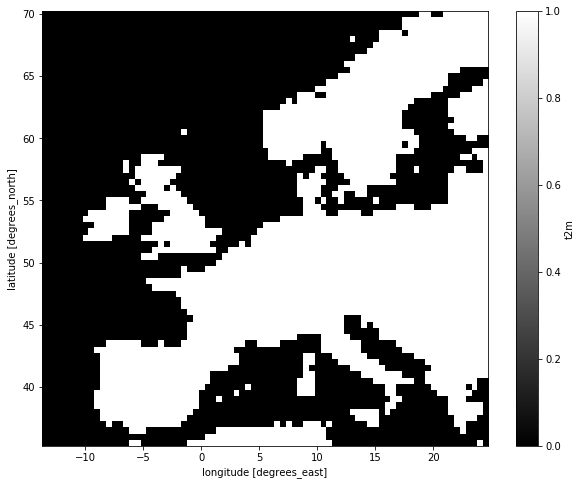

In [12]:
(~np.isnan(temperatures)).prod(dim='time').plot.imshow(cmap='gray')

# Exercise 1

Plot the mean temperature for each location!

(There will be a warning because of the NaNs, but that's okay.)

/opt/miniconda3/envs/scientific-computing/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


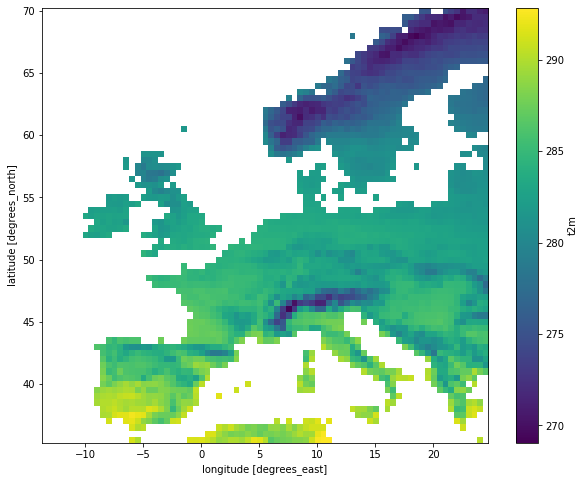

In [13]:
temperatures.mean(dim='time').plot.imshow()

Temperature seems not to be in °C...

In [14]:
temperatures = temperatures - 273.15
temperatures.name = 'Temperature [C°]'

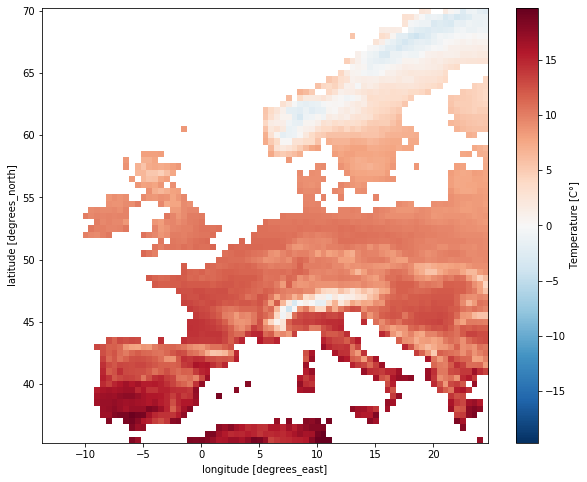

In [15]:
temperatures.mean(dim='time').plot.imshow()

# Pick random grid points to calculate the mean

As a next step, we want to calculate the mean temperature for each country.

We'll pick just some random samples from the grid for each country, to make computation of the man faster. The coordinates are already prepared as CSV file, which has been generated using the following code.

In [16]:
def choose_country_points(longitude, latitude, grid_points_per_country=200):
    """Pick random points for each country from the grid with axis ``longitude`` and ``latitude``.
    ``size`` is the number of points ot be picked for 
    
    Returns a dataframe with two columns per country (longitude & latitude)
    and ``grid_points_per_country`` numbers of rows.
    
    Note: GeoJSON always uses WGS84:
    https://tools.ietf.org/html/rfc7946
    
    """
    # local import to avoid dependency
    import geopandas
    from shapely.geometry import Point
    
    longitudes, latitudes = np.meshgrid(longitude, latitude)
    
    longitudes = longitudes.flatten()
    latitudes = latitudes.flatten()
    
    grid_points = geopandas.GeoSeries(geopandas.points_from_xy(longitudes.flatten(),
                                                           latitudes.flatten()))
    
    # XXX fix me, correct path!
    country_borders = geopandas.read_file('../data/countries.geojson')

    chosen_gridpoints = pd.DataFrame()

    for country in COUNTRIES:
        print(f"Picking grid points for {country}...")
        is_country = country_borders.ADMIN == country

        country_border = country_borders[is_country].geometry.iloc[0]

        is_in_country = grid_points.within(country_border)

        number_of_points = is_in_country.sum()
        
        # make things reproducible!
        np.random.seed(42)
        
        idcs = np.random.randint(number_of_points, size=grid_points_per_country)

        chosen_gridpoints[f'{country}_longitude'] = longitudes[is_in_country][idcs]
        chosen_gridpoints[f'{country}_latitude'] = latitudes[is_in_country][idcs]
        
    return chosen_gridpoints

In order to recreate the `country_points.csv` one needs to install `geopandas` and download a `GeoJSON` file (23MB) which contains the country borders:

In [17]:
# !conda install --yes geopandas
# !wget -O ../data/countries.geojson https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson

The following lines create the `country_points.csv`:

In [18]:
# country_points = choose_country_points(temperatures.longitude, temperatures.latitude)
# country_points.to_csv('../data/country_points.csv', index=False)

But since it is already prepared, let's just load it...

In [19]:
country_points = pd.read_csv('../data/country_points.csv')

In [20]:
country_points

,Austria_longitude,Austria_latitude,Germany_longitude,Germany_latitude,Switzerland_longitude,Switzerland_latitude,Italy_longitude,Italy_latitude,Spain_longitude,Spain_latitude,Sweden_longitude,Sweden_latitude,United Kingdom_longitude,United Kingdom_latitude
0,15.5,47.0,13.5,51.0,7.5,47.0,15.0,40.5,-4.0,40.5,16.0,65.0,-4.5,52.0
1,10.0,47.0,8.5,51.0,7.0,46.0,14.0,41.0,-3.0,38.0,12.0,58.0,-2.5,52.5
2,16.0,48.0,9.5,53.5,8.0,46.5,11.5,46.0,-1.5,41.0,18.0,65.0,-4.0,57.5
3,16.5,48.5,7.5,50.5,9.5,47.0,17.5,40.5,-5.0,43.0,17.5,66.0,-2.5,52.0
4,12.5,47.5,7.0,51.5,8.0,47.0,11.5,42.5,-2.0,40.5,16.0,62.0,-1.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,15.5,48.5,10.0,49.0,8.0,47.5,10.5,45.0,-4.5,37.5,21.0,65.5,0.5,52.5
196,11.5,47.0,10.0,50.0,7.5,46.0,8.0,46.0,-2.5,40.0,16.0,61.5,-6.0,55.0
197,14.5,48.5,12.0,50.0,6.5,46.5,17.0,41.0,-5.0,40.0,14.5,59.5,0.0,51.0
198,14.0,48.0,14.0,52.5,7.0,47.0,10.5,44.5,-2.5,37.0,20.5,64.0,-2.5,55.0


Let's plote some of these points:

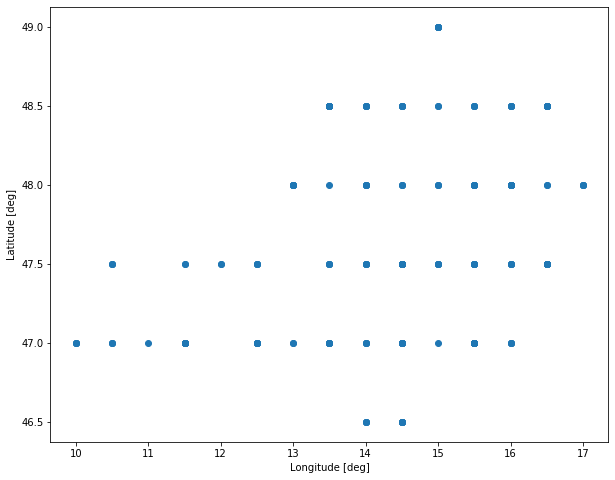

In [21]:
plt.plot(country_points['Austria_longitude'], country_points['Austria_latitude'], 'o')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]');

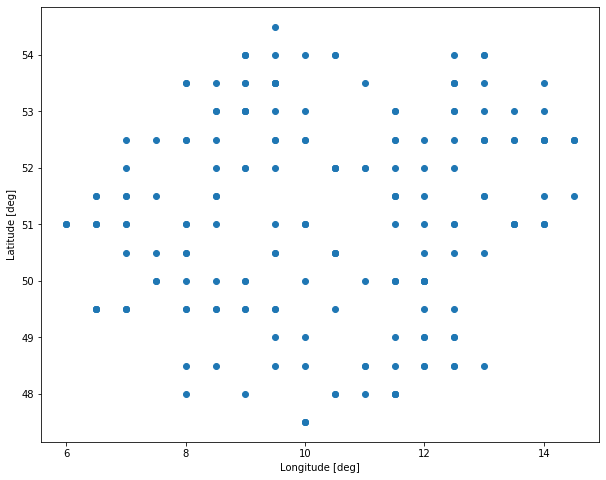

In [22]:
plt.plot(country_points['Germany_longitude'], country_points['Germany_latitude'], 'o')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]');

# Calculate mean temperature for each country

In [23]:
country = 'Austria'
country_temperature = temperatures.sel(
        longitude=xr.DataArray(country_points['Austria_longitude'], dims='points'),
        latitude=xr.DataArray(country_points['Austria_latitude'], dims='points'))

In [24]:
country_temperature

<xarray.DataArray 'Temperature [C°]' (time: 46009, points: 200)>
array([[ -4.2307434 , -14.59317   ,  -2.26297   , ...,  -2.5500488 ,
         -1.1437683 ,  -4.4457397 ],
       [ -4.213043  , -14.806885  ,  -1.690094  , ...,  -2.4906006 ,
         -1.6597595 ,  -4.369873  ],
       [ -4.1118774 , -14.935883  ,  -1.399231  , ...,  -2.2832031 ,
         -1.5117798 ,  -4.1422424 ],
       ...,
       [ -1.6825256 ,  -7.398651  ,  -2.71698   , ...,  -2.2642517 ,
         -0.60250854,  -0.72265625],
       [ -2.0328064 ,  -7.702179  ,  -2.9193115 , ...,  -2.8813782 ,
         -1.0615845 ,  -1.2196655 ],
       [ -2.1959534 ,  -7.993042  ,  -3.278473  , ...,  -3.1216736 ,
         -1.5180969 ,  -1.7330933 ]], dtype=float32)
Coordinates:
    longitude  (points) float32 15.5 10.0 16.0 16.5 12.5 ... 11.5 14.5 14.0 17.0
    latitude   (points) float32 47.0 47.0 48.0 48.5 47.5 ... 47.0 48.5 48.0 48.0
  * time       (time) datetime64[ns] 2015-01-01 ... 2020-04-01
  * points     (points) int64 0 1 2 3 4 5 6 7 ... 193 194 195 196 197 198 199

In [25]:
def calc_country_temperature(country):
    country_temperature = temperatures.sel(
        longitude=xr.DataArray(country_points[f'{country}_longitude'], dims='points'),
        latitude=xr.DataArray(country_points[f'{country}_latitude'], dims='points')).mean(dim='points')
    return country_temperature

In [26]:
temperature_at = calc_country_temperature('Austria')

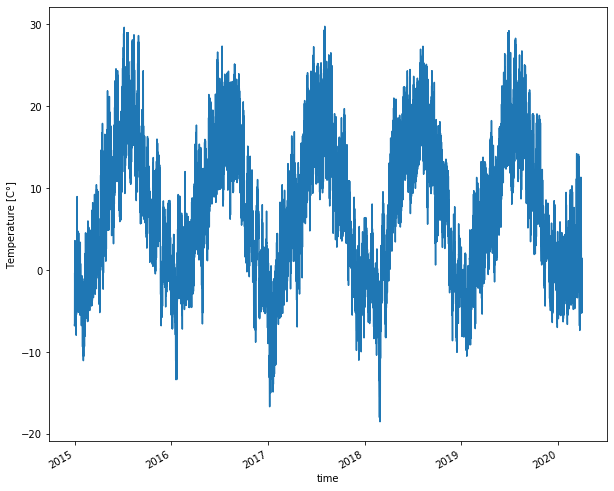

In [27]:
temperature_at.plot()

# Use mean temperature as feature for the load model

Can we improve the prediction by using the mean temperature for the country for each hour?

In [28]:
# let's use only non-Covid time series, anyway climate data is not yet available for March, April and May
power_demand = power_demand["2015-01-01":"2019-12-31"]

In [215]:
def train_forest(power_demand, X):
    Y = power_demand.values

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    forest = ensemble.RandomForestRegressor(n_estimators=300)
    forest.fit(X_train, Y_train)

    prediction_train = forest.predict(X_train)
    prediction_test = forest.predict(X_test)
       
    print("R2 score training: ", r2_score(Y_train, prediction_train),
          " - R2 score test:", r2_score(Y_test, prediction_test))
    
    return forest

In [216]:
country = 'Austria'
power_demand_country = power_demand[country]

X = np.array([power_demand_country.index.dayofyear.values,
              power_demand_country.index.weekday.values,
              power_demand_country.index.hour.values]).T

forest = train_forest(power_demand_country, X)

R2 score training:  0.9921841702926475  - R2 score test: 0.9432198731562388


In [217]:
country_temperature = calc_country_temperature(country)

In [218]:
X = np.array([power_demand_country.index.dayofyear.values,
              power_demand_country.index.weekday.values,
              power_demand_country.index.hour.values,
              country_temperature.interp(time=power_demand_country.index),
             ]).T

forest = train_forest(power_demand_country, X)

R2 score training:  0.9927686788510102  - R2 score test: 0.9431628427682708


In [33]:
for country in COUNTRIES:
    power_demand_country = power_demand[country]

    X = np.array([power_demand_country.index.dayofyear.values,
                  power_demand_country.index.weekday.values,
                  power_demand_country.index.hour.values]).T

    print(country)
    forest = train_forest(power_demand_country, X)

    country_temperature = calc_country_temperature(country)

    X = np.array([power_demand_country.index.dayofyear.values,
                  power_demand_country.index.weekday.values,
                  power_demand_country.index.hour.values,
                  country_temperature.sel(time=power_demand_country.index),
                 ]).T

    forest = train_forest(power_demand_country, X)

Austria
R2 score training:  0.9922329158585201  - R2 score test: 0.9434055450911697
R2 score training:  0.9928255371801671  - R2 score test: 0.9437465527001472
Germany
R2 score training:  0.9936854619530001  - R2 score test: 0.9550036362503029


KeyboardInterrupt: 

Result of the previous cell, if you don't want to wait for the computation...

<pre>Austria:
R2 score training:  0.9919011002720224  - R2 score test: 0.9430536865173593
R2 score training:  0.9928279087919563  - R2 score test: 0.9468364351058121

Germany:
R2 score training:  0.9933880571246583  - R2 score test: 0.9539841834855078
R2 score training:  0.9940009620976278  - R2 score test: 0.9560062602203074

Switzerland:
R2 score training:  0.9820738570674996  - R2 score test: 0.8818901179398776
R2 score training:  0.9819570886785727  - R2 score test: 0.8761312194956354

Italy:
R2 score training:  0.9961309164992136  - R2 score test: 0.9719904696653652
R2 score training:  0.9968348107929302  - R2 score test: 0.9759603596729277

Spain:
R2 score training:  0.9925356928133622  - R2 score test: 0.9468729711079595
R2 score training:  0.9951085475093822  - R2 score test: 0.9657767736692645

Sweden:
R2 score training:  0.9925511329897733  - R2 score test: 0.9413298526456573
R2 score training:  0.9948624569922019  - R2 score test: 0.9577132123193586

United Kingdom:
R2 score training:  0.9785190262375633  - R2 score test: 0.8367647702186678
R2 score training:  0.9808087684803176  - R2 score test: 0.855098212274145
</pre>

# experiment  mean without ML

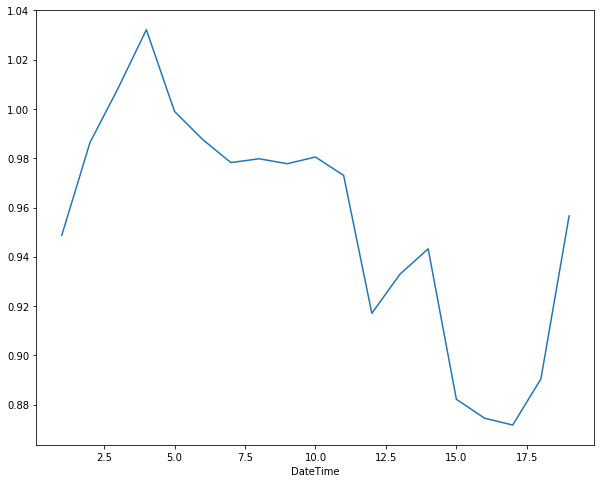

In [233]:
def get_weekly(power_demand):
    return power_demand.Austria.groupby(power_demand.Austria.index.week).mean()

(1/(get_weekly(power_demand['2015-01-01':'2019-12-31']) /  get_weekly(power_demand['2020-01-01':'2020-12-31']))).plot()

# experiment 

In [125]:
power_demand_country = power_demand[country]

country_temperature = calc_country_temperature(country)

X = np.array([power_demand_country.index.dayofyear.values,
              power_demand_country.index.weekday.values,
              power_demand_country.index.hour.values,
              #country_temperature.interp(time=power_demand_country.index),
             ]).T

Y = power_demand_country.values

In [126]:
idcs = np.arange(X.shape[0])
#np.random.shuffle(idcs)
idcs_test = idcs[:int(X.shape[0] * 0.2)]
idcs_train = idcs[int(X.shape[0] * 0.2):]

In [144]:
#test_scores = []
#train_scores = []
for i in range(11, 20):
    forest = ensemble.RandomForestRegressor(max_depth=i)
    forest.fit(X[idcs_train], Y[idcs_train])

    test_score = forest.score(X[idcs_test], Y[idcs_test])
    train_score = forest.score(X[idcs_train], Y[idcs_train])
    test_scores.append(test_score)
    train_scores.append(train_score)
    
    print(i, "test", test_score)
    print(i, "train", train_score)

11 test 0.9047057628312654
11 train 0.9437215281010027
12 test 0.9068686930713382
12 train 0.9494472792604665
13 test 0.9080245339532959
13 train 0.9550320113287417
14 test 0.9084049420883049
14 train 0.9599272966961507
15 test 0.9088670250185074
15 train 0.965089367569276
16 test 0.9091926553756494
16 train 0.9697815000531711
17 test 0.9082907889521977
17 train 0.9750893305771778
18 test 0.9058194081917212
18 train 0.9803249123070797
19 test 0.9041942116779349
19 train 0.9839959051696947


In [148]:
idcs = np.arange(X.shape[0])
np.random.shuffle(idcs)

idcs_test = idcs[:int(X.shape[0] * 0.2)]
idcs_train = idcs[int(X.shape[0] * 0.2):]

In [151]:
#test_scores_shuffled = []
#train_scores_shuffled = []

for i in range(20, 50):
    forest = ensemble.RandomForestRegressor(max_depth=i)
    forest.fit(X[idcs_train], Y[idcs_train])

    test_score = forest.score(X[idcs_test], Y[idcs_test])
    train_score = forest.score(X[idcs_train], Y[idcs_train])
    test_scores_shuffled.append(test_score)
    train_scores_shuffled.append(train_score)
    
    print(i, "test", test_score)
    print(i, "train", train_score)

20 test 0.9524031483204147
20 train 0.9877169556417762
21 test 0.9529321259544385
21 train 0.9897654990935131
22 test 0.9534930812836977
22 train 0.9913601252194247
23 test 0.9536410239748102
23 train 0.9923665289798266
24 test 0.9525511575513582
24 train 0.9927717542771094
25 test 0.9534616477510304
25 train 0.9932586273573218
26 test 0.9529300153248663
26 train 0.9934626477147016
27 test 0.9534083614215882
27 train 0.9936570831508477
28 test 0.9529462482815347
28 train 0.9936351459687444
29 test 0.9531487847309978
29 train 0.9937490404831582
30 test 0.95343894399032
30 train 0.9937831441387514
31 test 0.953617669660217
31 train 0.9938060046119526
32 test 0.9539652332328312
32 train 0.9938618707617939
33 test 0.9523390343261781
33 train 0.9936939701470537
34 test 0.9536560709482653
34 train 0.9938345475348952
35 test 0.9537311033301064
35 train 0.9937016829064055
36 test 0.9533441247435923
36 train 0.9938208781371388
37 test 0.9532312552989195
37 train 0.9937973880334958
38 test 0.954

lessons learned already:

- 364 * 7 * 24 is more than hourly data in 5 years, because $7>5$
- we don't want our model to remember if 2019 warm or cold, because it doesn't help to predict 2020
- if we ask the model for a combination of weekday/day of the year and hour, we'll mostly use just one year of the training data
- we made two independent mistakes:
    - overfitting: too few data for too many parameters
    - splitting: wrong testing of overfitting
- would this be the same problem with dummy variables?

open questions:

- what is this thing with independency? is there any good example of regression whitout time series? is this always the case that random split is a bad idea when dealing with time series?

- how to do early stopping, regularization or prevent random forest from overfiting the right way?

- are random forest and time series a problem in general? do we need shuffling of samples? can we get any issues because of dependencies?

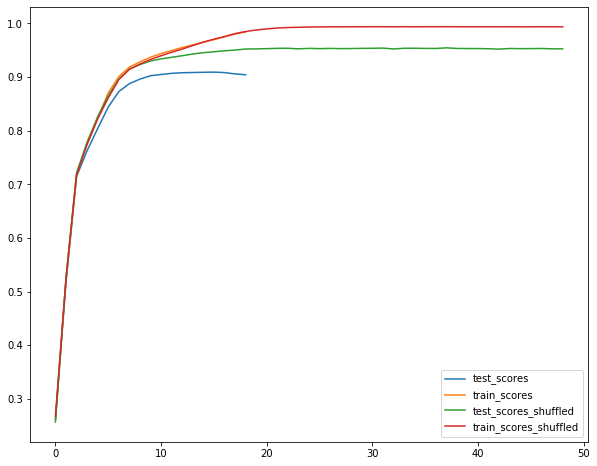

In [152]:
plt.plot(test_scores, label='test_scores')
plt.plot(train_scores, label='train_scores')

plt.plot(test_scores_shuffled, label='test_scores_shuffled')
plt.plot(train_scores_shuffled, label='train_scores_shuffled')

plt.legend()

# one more temp fit

In [235]:
power_demand[]

SyntaxError: invalid syntax (<ipython-input-235-d815f7a926f7>, line 1)

In [236]:
country

'Austria'

In [237]:
power_demand

AreaName,Austria,Germany,Italy,Spain,Sweden,Switzerland,United Kingdom
DateTime,,,,,,,
2014-12-01 23:00:00,6450.3,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-02 00:00:00,6434.2,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-02 01:00:00,6389.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-02 02:00:00,6594.1,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-02 03:00:00,6657.8,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2020-05-08 20:00:00,6016.4,47608.8075,28690.0,24781.0,13822.0,6203.32,24192.5
2020-05-08 21:00:00,5608.2,43793.9650,26291.0,22690.0,13141.0,6030.98,24192.5
2020-05-08 22:00:00,5608.2,41176.0175,23865.0,21647.0,12514.0,5701.18,24192.5


In [239]:
power_demand_country = power_demand[country]['2015-01-01':'2019-12-31']

In [238]:
country_temperature = calc_country_temperature(country)

X = np.array([power_demand_country.index.month.values,
              power_demand_country.index.weekday.values,
              power_demand_country.index.hour.values,
              #country_temperature.interp(time=power_demand_country.index),
             ]).T

Y = power_demand_country.values

# temperature fit

In [245]:
country = 'Austria'

In [250]:
power_demand_country = power_demand[country]['2015-01-01':'2019-12-31']

country_temperature = calc_country_temperature(country)

In [258]:
X = np.array([power_demand_country.index.dayofyear.values,
              #power_demand_country.index.weekday.values,
              power_demand_country.index.hour.values,
              country_temperature.interp(time=power_demand_country.index),
             ]).T

Y = power_demand_country.values

In [259]:
idcs_test = power_demand_country.index.year == 2017
idcs_train = power_demand_country.index.year != 2017

In [260]:
forest = ensemble.RandomForestRegressor()
forest.fit(X[idcs_train], Y[idcs_train])

test_score = forest.score(X[idcs_test], Y[idcs_test])
train_score = forest.score(X[idcs_train], Y[idcs_train])

print(i, "test", test_score)
print(i, "train", train_score)

49 test 0.5957161694084844
49 train 0.9611174231885627


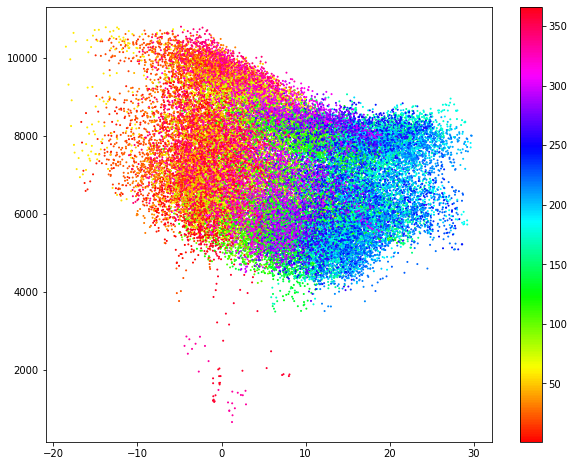

In [256]:
#idcs = 
plt.scatter(country_temperature.interp(time=power_demand_country.index), power_demand_country,
           c=power_demand_country.index.dayofyear, s=1, cmap='hsv')
plt.colorbar()

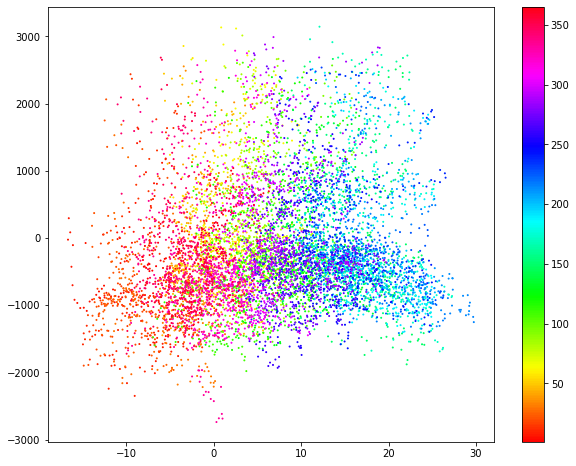

In [257]:
plt.scatter(country_temperature.interp(time=power_demand_country[idcs_test].index),
            forest.predict(X[idcs_test]) - power_demand_country[idcs_test],
           c=power_demand_country[idcs_test].index.dayofyear, s=1, cmap='hsv')
plt.colorbar()

In [204]:
power_demand_country = power_demand[country]

country_temperature = calc_country_temperature(country)

X = np.array([power_demand_country.index.month.values,
              power_demand_country.index.weekday.values,
              power_demand_country.index.hour.values,
              country_temperature.interp(time=power_demand_country.index),
             ]).T

Y = power_demand_country.values

In [205]:
idcs = np.arange(X.shape[0])
#np.random.shuffle(idcs)
idcs_test = idcs[int(X.shape[0] * 0.2):]
idcs_train = idcs[:int(X.shape[0] * 0.2)]

In [206]:
forest = ensemble.RandomForestRegressor()
forest.fit(X[idcs_train], Y[idcs_train])

test_score = forest.score(X[idcs_test], Y[idcs_test])
train_score = forest.score(X[idcs_train], Y[idcs_train])

print(i, "test", test_score)
print(i, "train", train_score)

49 test 0.6359200425996306
49 train 0.970681641738183


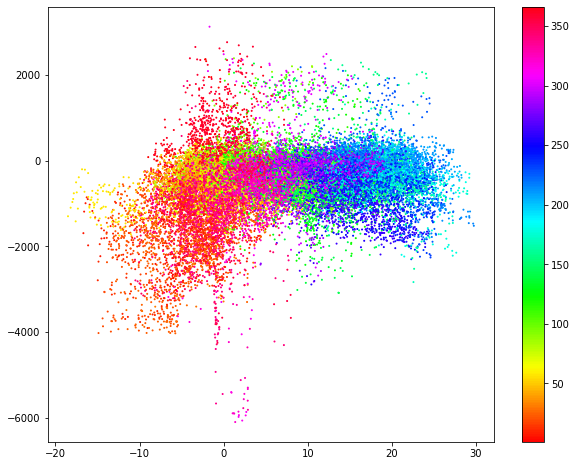

In [207]:
plt.scatter(country_temperature.interp(time=power_demand_country[idcs_test].index),
            forest.predict(X[idcs_test]) - power_demand_country[idcs_test],
           c=power_demand_country[idcs_test].index.dayofyear, s=1, cmap='hsv')
plt.colorbar()

# more experiments

$f(x) = d_1 \cdot \xi_1 + d_2 \cdot \xi_2 + \ldots + d_{365} \cdot \xi_{365}\\
+ h_1 \cdot \xi_{367}$

In [48]:
forest.score(X[idcs_test], Y[idcs_test])

0.9546535849598938

In [49]:
temperature_day_of_year = np.array([temperature_at[np.abs(temperature_at.time.dt.dayofyear - dayofyear) < 5].mean()
 for dayofyear in range(0, 366)])

Text(0.5, 0, 'Temp deviation to mean [DegC]')

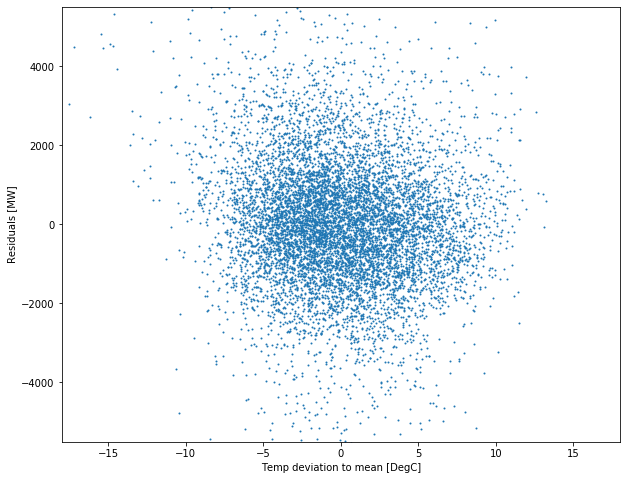

In [50]:
plt.plot(temperature_at.interp(time=power_demand_country.index[idcs_test])
         - temperature_day_of_year[power_demand_country[idcs_test].index.dayofyear - 1],
         Y[idcs_test] - forest.predict(X[idcs_test]), 'o', markersize=1)
plt.ylim(-5500, 5500)
plt.xlim(-18, 18)
plt.ylabel('Residuals [MW]')
plt.xlabel('Temp deviation to mean [DegC]')

Text(0.5, 0, 'Temp deviation to mean [DegC]')

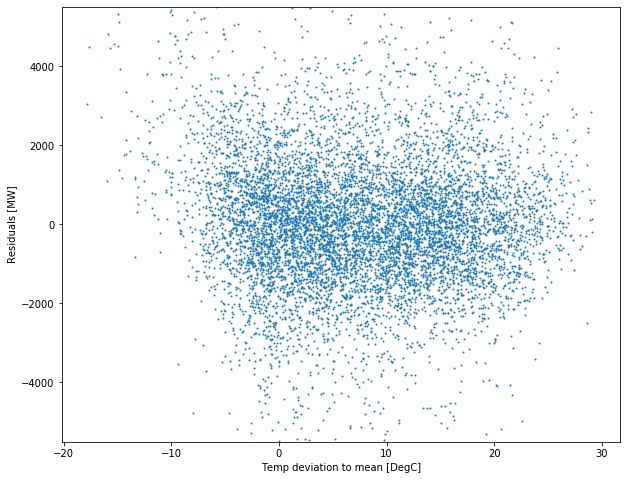

In [54]:
plt.plot(temperature_at.interp(time=power_demand_country.index[idcs_test]),
         Y[idcs_test] - forest.predict(X[idcs_test]), 'o', markersize=1)
plt.ylim(-5500, 5500)
#plt.xlim(-18, 18)
plt.ylabel('Residuals [MW]')
plt.xlabel('Temp deviation to mean [DegC]')

In [51]:
np.corrcoef(temperature_at.interp(time=power_demand_country.index[idcs_test])
         - temperature_day_of_year[power_demand_country[idcs_test].index.dayofyear - 1],
         Y[idcs_test] - forest.predict(X[idcs_test]))

array([[ 1.        , -0.07561281],
       [-0.07561281,  1.        ]])

In [ ]:
country_temperature = calc_country_temperature(country)

X = np.array([power_demand_country.index.dayofyear.values,
              power_demand_country.index.weekday.values,
              power_demand_country.index.hour.values,
              country_temperature.interp(time=power_demand_country.index),
             ]).T

forest = train_forest(power_demand_country, X)

In [ ]:
temperature_day_of_year

In [170]:
power_demand_country.index.dayofyear

Int64Index([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
            ...
            365, 365, 365, 365, 365, 365, 365, 365, 365, 365],
           dtype='int64', name='DateTime', length=43824)

# experiment 2

In [267]:
def f(x):
    return 3*x **2 + 4

def f_noisy(x):
    np.random.seed(42)
    return 3*x **2 + 4 + np.random.normal(scale=3, size=len(x))

In [268]:
N = 100
x_coords = np.linspace(-3, 7, num=N)

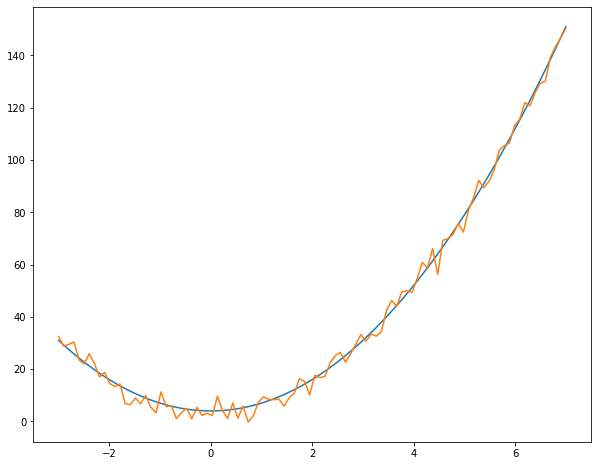

In [269]:
plt.plot(x_coords, f(x_coords))
plt.plot(x_coords, f_noisy(x_coords))

In [270]:
X = np.random.uniform(-3, 7, size=1000)

X = np.random.uniform(-3, 7, size=1000)
Y = f_noisy(X)

In [271]:
np.unique(X).shape  # unique!

(1000,)

In [272]:
X = X[:, np.newaxis]

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [274]:
forest = ensemble.RandomForestRegressor()

In [275]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [276]:
forest.score(X_test, y_test)

0.9914697766858988

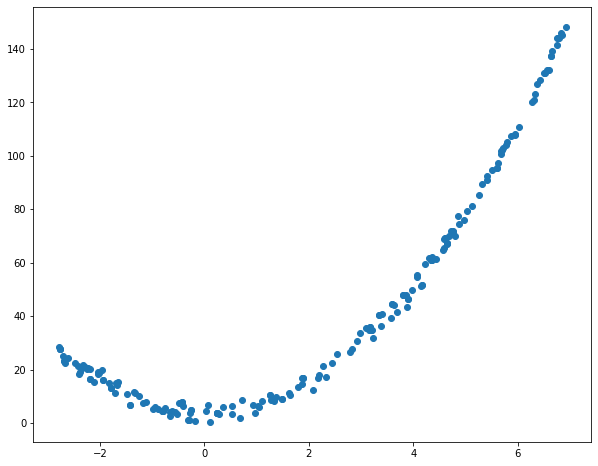

In [277]:
plt.plot(X_test[:, 0], forest.predict(X_test), 'o')

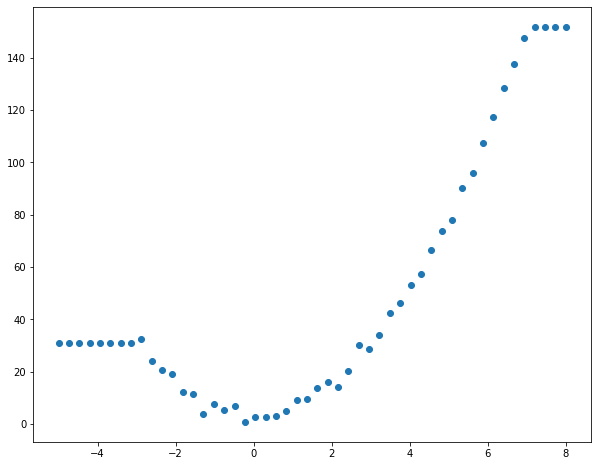

In [279]:
plt.plot(np.linspace(-5, 8), forest.predict(np.linspace(-5, 8)[:, np.newaxis]), 'o')

# Who likes to have it warm?

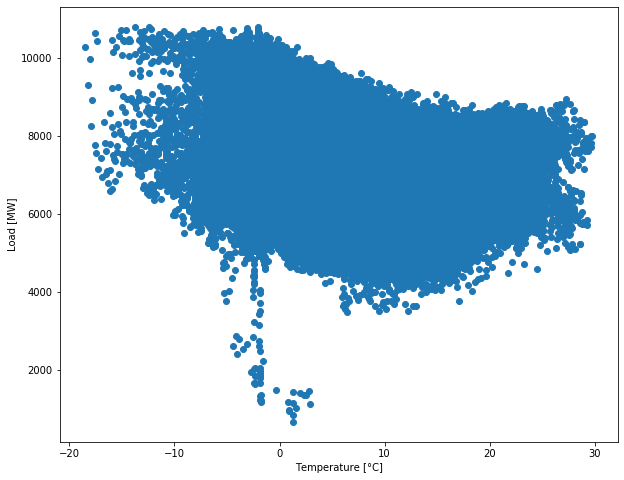

In [34]:
plt.plot(temperature_at.interp(time=power_demand.Austria.index),
         power_demand.Austria, 'o')
plt.xlabel('Temperature [°C]')
plt.ylabel('Load [MW]');

In [35]:
idcs = (power_demand_country.index.weekday == 2) & (power_demand_country.index.hour == 9)

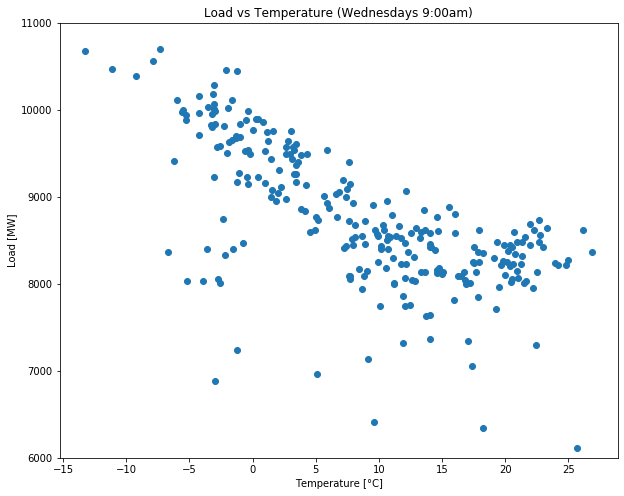

In [36]:
plt.plot(temperature_at.interp(time=power_demand.Austria.index[idcs]),
         power_demand.Austria[idcs], 'o')
plt.ylim(6_000, 11_000)
plt.xlabel('Temperature [°C]')
plt.ylabel('Load [MW]')
plt.title("Load vs Temperature (Wednesdays 9:00am)");

In [37]:
from scipy.ndimage import median_filter

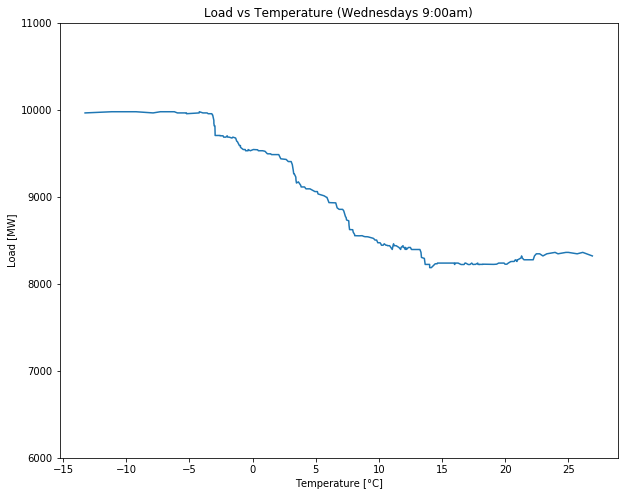

In [44]:
power_temperature = pd.DataFrame()
power_temperature['TotalLoadValue'] = power_demand.Austria[idcs]
power_temperature['Temperature'] = temperature_at.interp(time=power_demand.Austria.index[idcs])

power_temperature = power_temperature.sort_values('Temperature')

power_temperature.TotalLoadValue = median_filter(power_temperature.TotalLoadValue, size=50)

plt.plot(power_temperature.Temperature,
         power_temperature.TotalLoadValue, '-')

plt.ylim(6_000, 11_000)
plt.xlabel('Temperature [°C]')
plt.ylabel('Load [MW]')
plt.title("Load vs Temperature (Wednesdays 9:00am)");

In [214]:
for country in COUNTRIES:
    power_demand_country = power_demand[country]

    country_temperature = calc_country_temperature(country)

    # select observations from Wednesdays 9:00am
    idcs = (power_demand_country.index.weekday == 2) & (power_demand_country.index.hour == 9)

    power_temperature = pd.DataFrame()

    power_temperature['TotalLoadValue'] = power_demand_country[idcs]
    power_temperature['Temperature'] = country_temperature.interp(time=power_demand_country.index[idcs])
    power_temperature = power_temperature.sort_values('Temperature')

    normalized_load = power_temperature.TotalLoadValue / power_temperature.TotalLoadValue.mean()
    normalized_load_filtered =  median_filter(normalized_load, size=50)
    
    plt.plot(power_temperature.Temperature, normalized_load_filtered, '-', label=country)

plt.xlabel('Temperature [°C]')
plt.ylabel('Load relative to mean load')
plt.legend();

NameError: name 'median_filter' is not defined